In [30]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [31]:
# Open files Both files are opened as ny drop or changes in feature will be done is both normal and one hot file
df1 = pd.read_csv('OriginalImportedFile_enc_Normal.csv')
df2 = pd.read_csv('OriginalImportedFile_enc_OneHot.csv')

In [32]:
# Setting the lists
Day_Data = ['q_DayMins','q_DayCalls','q_DayCharge']
Eve_Data = ['q_EveMins','q_EveCalls','q_EveCharge']
Nig_Data = ['q_NightMins','q_NightCalls','q_NightCharge']
Int_Data = ['q_InternationalMins','q_Internationalcalls','q_InternationalCharge']
ALL = ['q_DayMins','q_DayCalls','q_DayCharge','q_EveMins','q_EveCalls','q_EveCharge','q_NightMins','q_NightCalls','q_NightCharge','q_InternationalMins','q_Internationalcalls','q_InternationalCharge']

In [33]:
# C_Phone was already dropped before as it like an Id data

## Full Correlation matrix

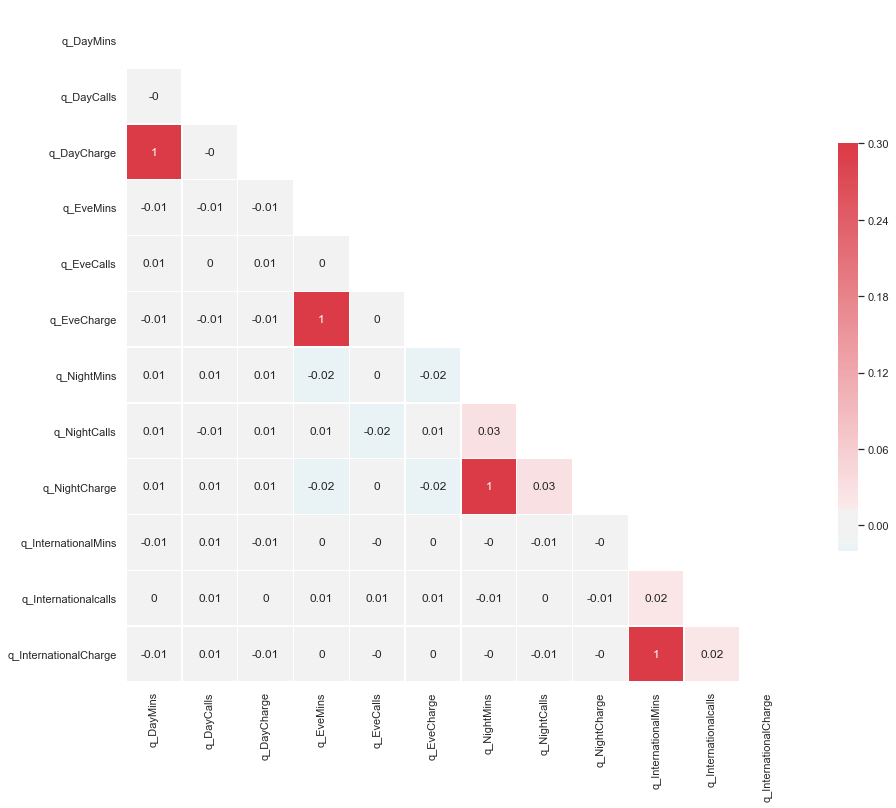

In [34]:
# Run Correlation
Corr_All= df1[ALL].corr().round(2)
# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(Corr_All, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 15,15
sb.heatmap(Corr_All,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

# The Figute shows a corr coeff of 1 between minutes and charges.. hence we choose to drop all the Charge coulumns

## Do we need all the minutes and calls columns?

In [35]:
# Add new created variables
df1['q_TotalMins'] = df1.q_DayMins + df1.q_EveMins + df1.q_NightMins + df1.q_InternationalMins
df1['q_TotalIndiaMins'] = df1.q_DayMins + df1.q_EveMins + df1.q_NightMins

df2['q_TotalCalls'] = df2.q_DayCalls + df2.q_EveCalls + df2.q_NightCalls + df2.q_Internationalcalls
df2['q_TotalIndiaCalls'] = df2.q_DayCalls + df2.q_EveCalls + df2.q_NightCalls

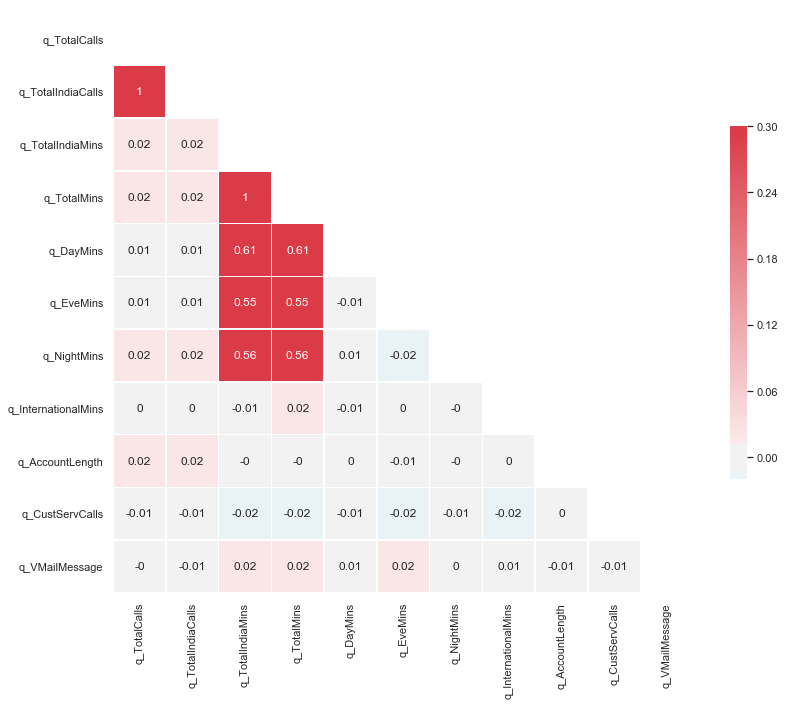

In [36]:
# Set Columns List
Agg_Data = ['q_TotalCalls','q_TotalIndiaCalls','q_TotalIndiaMins','q_TotalMins','q_DayMins','q_EveMins','q_NightMins','q_InternationalMins','q_AccountLength','q_CustServCalls','q_VMailMessage']

# Correlate
corr_matrix_AggData = df1[Agg_Data].corr().round(2) 

# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(corr_matrix_AggData, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 13,13
sb.heatmap(corr_matrix_AggData,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

# We dont find any vaery strong correaltions ( r>.8) between TotalIndia,TotalMins and Other observed columns.
#So no case of reducing any of these columns





In [37]:
# Correleation with a Outcome variable
# Since Out come variable is categorical, we dont need to to any correation between predictor and outcome variables 


In [39]:
# remove charge columns & the New Columns created for EDA from both the files. masked for safety
Delete_Col_List = ['q_DayCharge','q_EveCharge','q_NightCharge','q_InternationalCharge','q_TotalMins', 'q_TotalIndiaMins', 'q_TotalCalls','q_TotalIndiaCalls']
df1.drop(Delete_Col_List, inplace=True,axis=1)
Delete_Col_List = ['q_DayCharge','q_EveCharge','q_NightCharge','q_InternationalCharge']
df2.drop(Delete_Col_List, inplace=True,axis=1)

In [42]:
# Save and mask
df1.to_csv("OriginalImportedFile_enc_Normal_FE.csv", index=False)
df2.to_csv("OriginalImportedFile_enc_OneHot_FE.csv",index = False)


In [40]:
print(df1.columns)
print(df2.columns)

Index(['c_AreaCode', 'c_InternationalPlan', 'c_State', 'c_VMailPlan',
       'q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayMins',
       'q_EveCalls', 'q_EveMins', 'q_InternationalMins',
       'q_Internationalcalls', 'q_NightCalls', 'q_NightMins', 'q_VMailMessage',
       'y_Churn'],
      dtype='object')
Index(['c_AreaCode0', 'c_AreaCode1', 'c_AreaCode2', 'c_InternationalPlan',
       'c_State', 'c_VMailPlan', 'q_AccountLength', 'q_CustServCalls',
       'q_DayCalls', 'q_DayMins', 'q_EveCalls', 'q_EveMins',
       'q_InternationalMins', 'q_Internationalcalls', 'q_NightCalls',
       'q_NightMins', 'q_VMailMessage', 'y_Churn'],
      dtype='object')
